<a href="https://colab.research.google.com/github/annaprotsek/NM/blob/main/%D0%9B%D1%805_%D0%B211_%D0%9F%D1%80%D0%BE%D1%86%D0%B8%D0%BA_%D0%90_%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 5
Розв'язання систем нелінійних рівнянь.
Була присутня на парі 03.10

In [ ]:
# Матриця А та вектор b
a = [[3,  0, 0,  7,  1],
     [9,  7, 9, -1,  4],
     [0,  2, 2,  0,  0],
     [5, -2, 5,  0,  6],
     [1,  9, 7,  8, -3]]
b = [7, -9, 6, 15, -7]

In [ ]:
# Довжина списку
d = len(b)

# Прямий хід
for m in range(0,d-1):
    for j in range(m+1,d):
        k = a[j][m] / a[m][m]
        for i in range(m,d):
            a[j][i] = a[j][i] - k*a[m][i]
        b[j] = b[j] - k*b[m]

# Скалярний добуток
def scalar_product(a, b, n):
    s = 0
    for i in range(n+1, d):
        s = s + a[n][i]*b[i]
    return s

# Зворотний хід
for i in range(d-1, -1, -1):
    b[i] = (b[i] - scalar_product(a, b, i)) / a[i][i]

# Відображення результатів
print('Матриця А після перетворень прямого ходу')
for i in range(0,d):
    print(a[i])
print()
print("Вектор розв'язку x")
for i in range(0,d):
    print(b[i])

In [ ]:
import numpy as np
from numpy.linalg import solve

a = np.array([[3, 0, 0, 7, 1],
              [9, 7, 9,-1, 4],
              [0, 2, 2, 0, 0],
              [5,-2, 5, 0, 6],
              [1, 9, 7, 8,-3]])
b = np.array([7, -9, 6, 15, -7])

x = solve(a,b)

for i in range(len(x)):
    print(x[i])

In [ ]:
import sympy as sp

a = sp.Matrix([[3, 0, 0, 7, 1],
                 [9, 7, 9,-1, 4],
                 [0, 2, 2, 0, 0],
                 [5,-2, 5, 0, 6],
                 [1, 9, 7, 8,-3]])
b = sp.Matrix([7, -9, 6, 15, -7])

x = a.solve(b)

print(x)

In [ ]:
import sympy as sp

a11 = sp.symbols('a11')
a12 = sp.symbols('a12')
a21 = sp.symbols('a21')
a22 = sp.symbols('a22')
b1 = sp.symbols('b1')
b2 = sp.symbols('b2')

a = sp.Matrix([[a11, a12],
                 [a21, a22]])
b = sp.Matrix([b1, b2])
x = a.solve(b)

print(x)

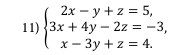

In [19]:
import numpy as np

In [20]:
a = np.array([
    [2, -1, 1],
    [3, 4, -2],
    [1, -3, 1],
])
b = np.array([[5], [-3], [4]])

In [21]:
def solve_gausse(a, b, verbose=False):
    det = np.linalg.det(a)
    if verbose:
        print(f"Визначник матриці A: {round(det)}")
    if abs(det) < 1e-12:
        print("Визначник дорівнює нулю — система не має єдиного розв’язку.")
        return None

    n = len(b)
    m = np.concatenate([a.astype(float), b.astype(float)], axis=1)

    for i in range(n):
        if m[i, i] == 0:
            for k in range(i + 1, n):
                if m[k, i] != 0:
                    m[[i, k], :] = m[[k, i], :]
                    break

        m[i, :] = m[i, :] / m[i, i]

        for j in range(n):
            if i != j:
                ratio = m[j, i]
                m[j, :] -= ratio * m[i, :]

    return np.round(m[:, [-1]], 3)

print("Вектор рішення:")
print(solve_gausse(a, b, verbose=True))

Вектор рішення:
Визначник матриці A: -12
[[1.]
 [0.]
 [3.]]


# **2 частина**

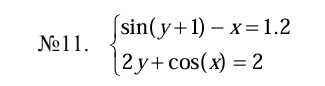

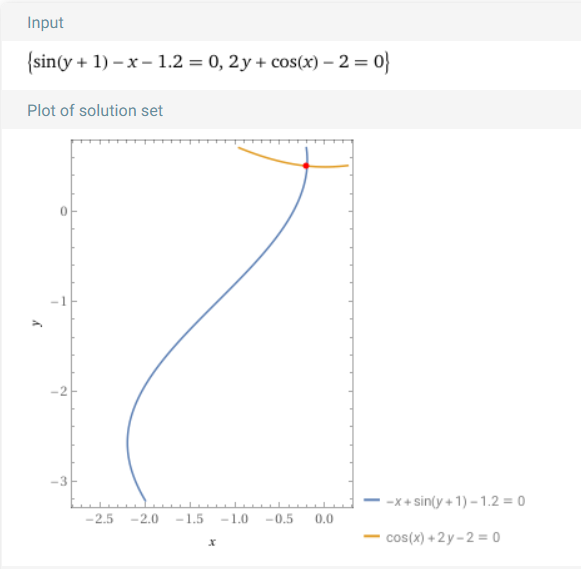

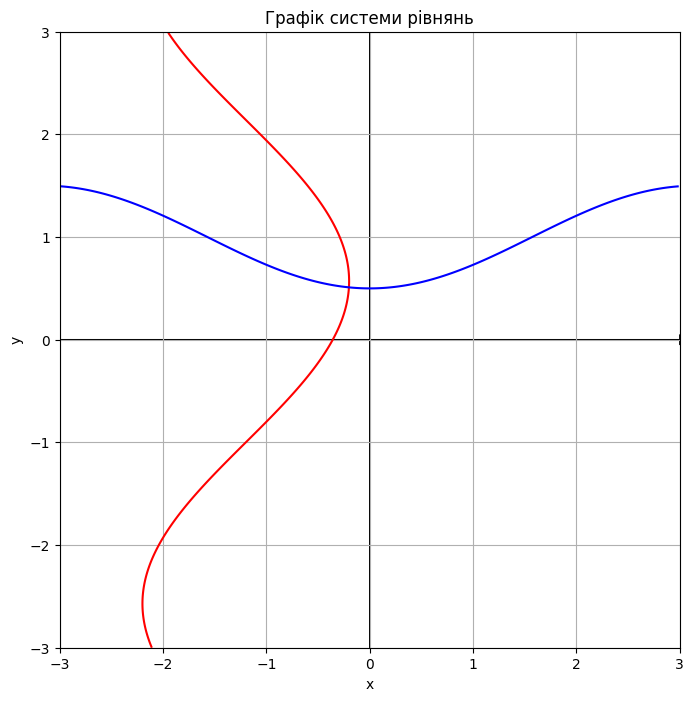

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Область значень для x та y
x_min, x_max = -3, 3
y_min, y_max = -3, 3
step = 0.01

# Створюємо масиви значень x та y
x, y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Рівняння системи
eq1 = np.sin(y + 1) - x - 1.2
eq2 = 2*y + np.cos(x) - 2

# Створюємо графік
fig, ax = plt.subplots(figsize=(8, 8))

# Додаємо графік першого рівняння
ax.contour(x, y, eq1, levels=[0], colors='red')

# Додаємо графік другого рівняння
ax.contour(x, y, eq2, levels=[0], colors='blue')

# Налаштування графіка
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь')

# Додаємо стрілки на кінцях осей
ax.arrow(x_min, 0, x_max - x_min, 0, head_width=0.1, head_length=0.05, fc='black', ec='black')
ax.arrow(0, y_min, 0, y_max - y_min, head_width=0.1, head_length=0.2, fc='black', ec='black')

# Додаємо сітку
plt.grid(True)

# Показуємо графік
plt.show()


In [23]:
import numpy as np
import matplotlib.pyplot as plt


In [27]:
#Розв'язок системи рівнянь методом простої ітерації
import numpy as np
from scipy import optimize
import math

x0, y0 = -0.3, 0.9
eps = 0.001

def f_x(y):
    return math.sin(y + 1) - 1.2 #задаємо функції
def f_y(x):
    return (2 - math.cos(x)) / 2 #задаємо функції

#Перевірка методу на збіжність

def simple_iteration(x, y, eps, max_iter=1000):
    xn = x
    yn = y
    xn1 = f_x(yn)
    yn1 = f_y(xn)
    n = 1
    while (abs(xn1 - xn) >= eps) or (abs(yn1 - yn) >= eps):
        xn = xn1
        yn = yn1
        xn1 = f_x(yn)
        yn1 = f_y(xn)
        n += 1
        if n > max_iter:
          raise RuntimeError("Не зійшлось за max_iter")
    print ('Simple iteration:')
    print(f'x = {xn1:.5f}, y = {yn1:.5f}, iterations = {n}')
    return xn1, yn1, n

x_iter, y_iter, n_iter = simple_iteration(x0, y0, eps)

def system(p):
    x, y = p
    return [math.sin(y + 1) - x - 1.2, 2*y + math.cos(x) - 2]

sol = optimize.root(system, [x0, y0], method='hybr')
print("Check (scipy):", sol.x)


Simple iteration:
x = -0.20184, y = 0.51012, iterations = 4
Check (scipy): [-0.20183842  0.51015016]


Зверніть увагу!
#Відповіді мають співпасти.

